In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline

sns.set(font_scale=1.3)

# t-SNE

<a href="http://lvdmaaten.github.io/tsne/">Страница на сайте автора</a>

<a href="https://cran.r-project.org/web/packages/tsne/tsne.pdf">Реализация в R</a>

Реализация в sklearn:
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html">`sklearn.manifold.TSNE`</a>`(n_components=2, perplexity=30, ...)`

* `n_components` &mdash; число компонент;
* `perplexity` &mdash; перплексия (сглаженный показатель эффективного числа соседей).

Методы:
* `fit_transforn(X)` &mdash; обучиться на данных `X` и вернуть сжатое представление `X`.

## `MulticoreTSNE` 
[Главная страница проекта](https://github.com/DmitryUlyanov/Multicore-TSNE).  

`MulticoreTSNE(n_components=2, perplexity=30.0, early_exaggeration=12, learning_rate=200, n_iter=1000, n_iter_early_exag=250, n_iter_without_progress=30, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0, random_state=None, method='barnes_hut', angle=0.5, n_jobs=1, cheat_metric=True,)`

**Гиперпараметры**  
* `n_components` &mdash; размерность сжатого пространства
* `perplexity` &mdash; связано с количеством соседей для оценки многообразия.  

**Методы**
* `fit(X)` &mdash; обучиться на данных `X`.
* `fit_transform(X, y=None)` &mdash; обучиться на данных `X` и вернуть сжатое представление `X`.

Ускорение достигается за счет параллелизации алгоритма. Распараллеливание можно эффективно произвести на этапе поиска ближайших соседей, причем это ускорение дает хороший эффект при большой размерности выборочного пространства. Например, для пространства картинок.

*Замечание: С версии 0.22 реализация из `sklearn` также поддерживает распараллеливание.*

### Примеры использования метода t-SNE

Генерация выборки размера 500 из пяти "облаков" (гауссовских выборок) в 10-мерном пространстве.

In [2]:
n_samples = 500
n_features = 10

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=5)

Простое применение t-SNE для сжатия в пространство размерности 2.

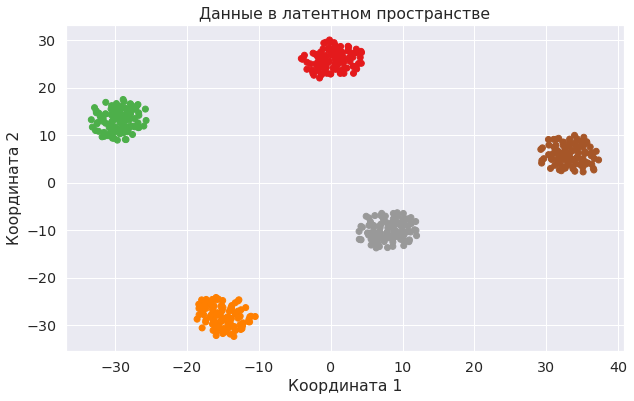

In [3]:
n_components = 2

tsne = TSNE(n_components=n_components)
X_hat = tsne.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_hat[:, 0], X_hat[:, 1], c=y, cmap='Set1')
plt.xlabel('Координата 1')
plt.ylabel('Координата 2')
plt.title('Данные в латентном пространстве')
plt.show()

Посмотрим, как меняется расположение точек в двумерном пространстве в зависимости от значения перплексии (сглаженный показатель эффективного числа соседей).

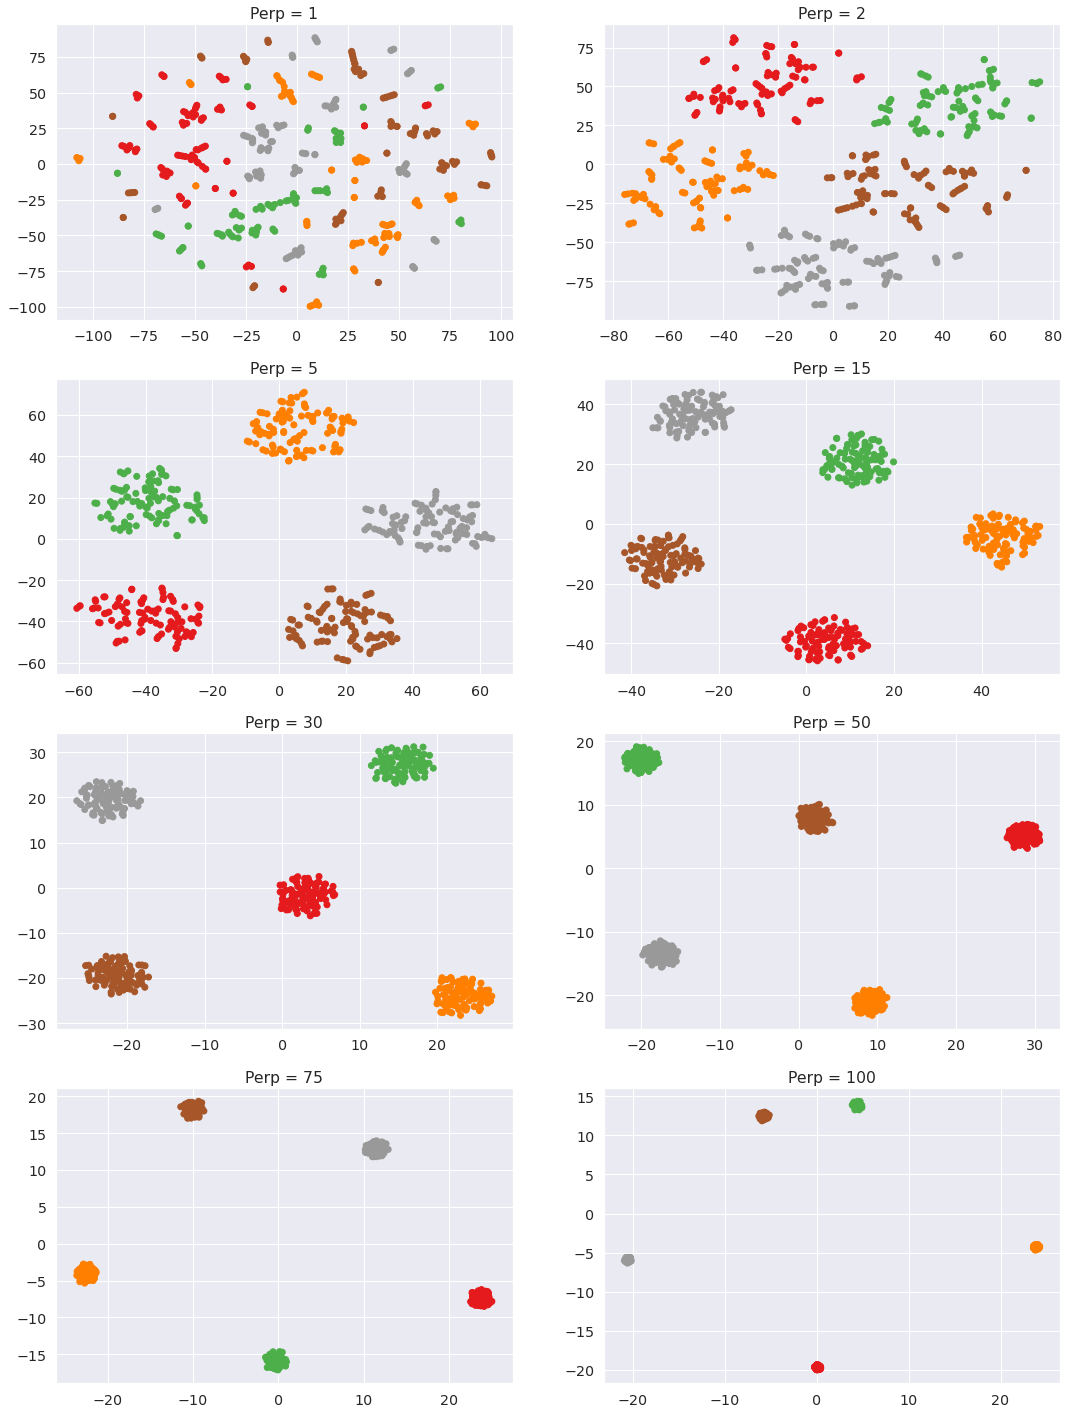

In [4]:
plt.figure(figsize=(18, 25))

for i, perplexity in enumerate([1, 2, 5, 15, 30, 50, 75, 100]):

    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_hat = tsne.fit_transform(X)

    plt.subplot(4, 2, i+1)
    plt.scatter(X_hat[:, 0], X_hat[:, 1], c=y, cmap='Set1')
    plt.title('Perp = {}'.format(perplexity))

Как видим, чем меньше перплексия, тем более картинка получается размытой.
Это происходит из-за того, что с уменьшением перплексии уменьшаются величины $\sigma_i$, отвечающие за дисперсию.
При малом значении перплексии на расположение точки в маломерном пространстве влияют только самые ближайшие соседи.

Если же увеличить дисперсию "облаков", то картинка станет хуже при том же значении перплексии (30).

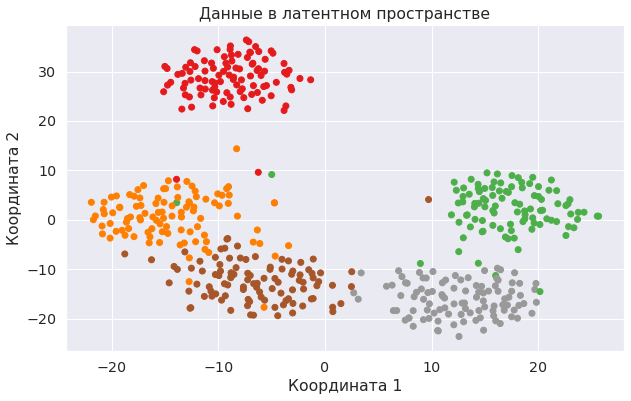

In [5]:
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=5, cluster_std=5)

tsne = TSNE(n_components=2)
X_hat = tsne.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_hat[:, 0], X_hat[:, 1], c=y, cmap='Set1')

plt.xlabel('Координата 1')
plt.ylabel('Координата 2')
plt.title('Данные в латентном пространстве')

plt.show()

## MNIST
Загрузим часть обычного MNIST'а

In [6]:
X = np.loadtxt('train.txt')
labels = np.loadtxt('train_labels.txt')

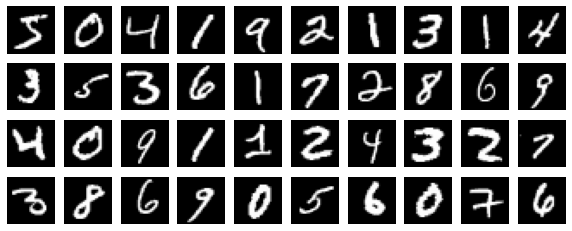

In [7]:
plt.figure(figsize=(10, 4))
for i in range(40):
    plt.subplot(4, 10, i + 1)
    plt.imshow(X[i].reshape((28, 28)), cmap='gray')
    plt.axis('off')

Применим к нему сначала PCA для сжатия в пространство размерности 30, а затем t-SNE для сжатия в двумерное пространство.

In [8]:
%%time
pca = PCA(n_components=30)
Y = pca.fit_transform(X)

CPU times: user 8.82 s, sys: 2.91 s, total: 11.7 s
Wall time: 3.46 s


Доля дисперсии данных, которую они могут объяснить

In [9]:
pca.explained_variance_ratio_.sum()

0.7305372219691121

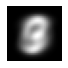

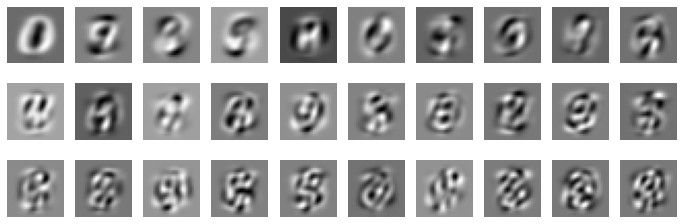

In [10]:
plt.figure(figsize=(1, 1))
plt.imshow(pca.mean_.reshape((28, 28)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(12, 4))    
for i in range(30):
    plt.subplot(3, 10, i + 1)
    plt.imshow(pca.components_[i].reshape((28, 28)), cmap='gray')
    plt.axis('off')

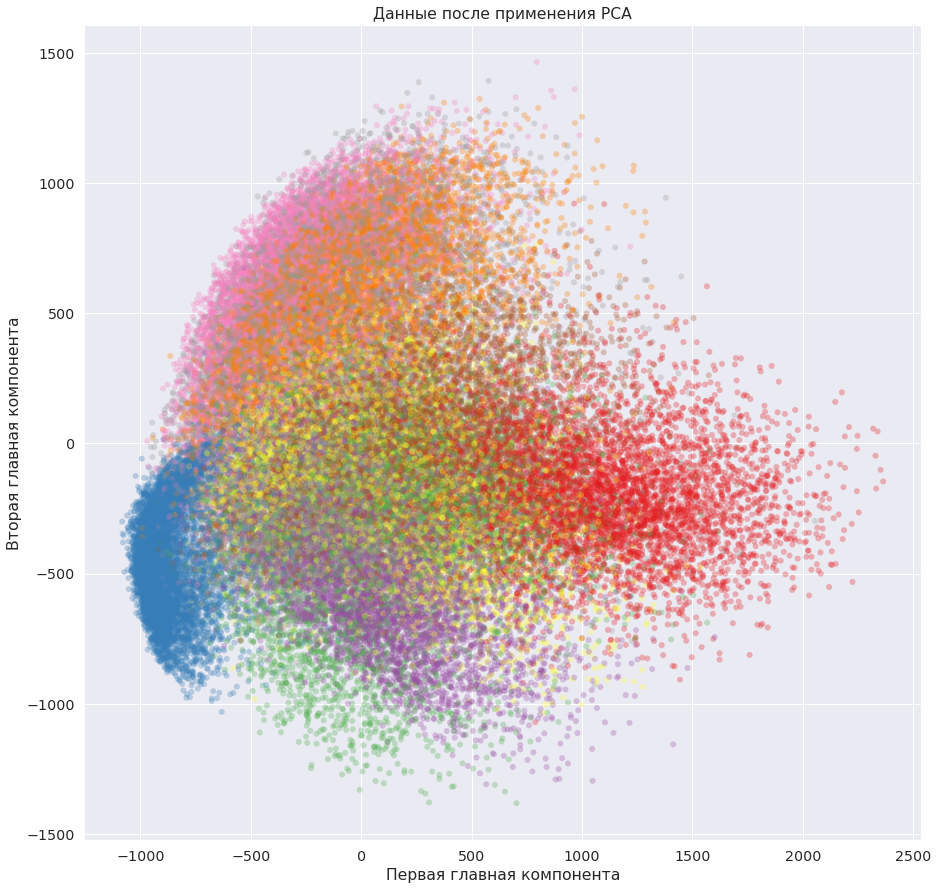

In [11]:
plt.figure(figsize=(15, 15))
plt.scatter(Y[:, 0], Y[:, 1], c=labels, linewidths=0, cmap='Set1', alpha=0.3)

plt.title('Данные после применения PCA')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')

plt.show()

In [12]:
%%time
tsne = TSNE(n_components=2, perplexity=40)
Z = tsne.fit_transform(Y)

CPU times: user 21min 20s, sys: 2.22 s, total: 21min 22s
Wall time: 8min 28s


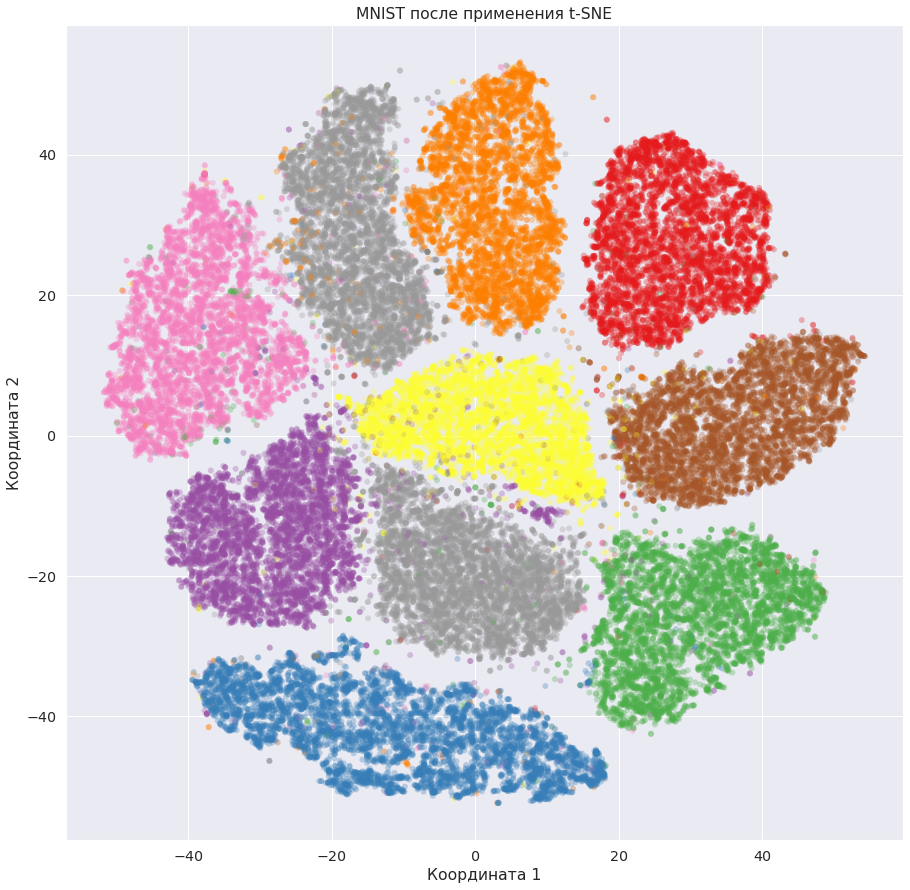

In [13]:
plt.figure(figsize=(15, 15))
plt.scatter(Z[:, 0], Z[:, 1], c=labels, linewidths=0, cmap='Set1', alpha=0.3)
plt.title('MNIST после применения t-SNE')
plt.xlabel('Координата 1')
plt.ylabel('Координата 2')
plt.show()

In [14]:
# цвета для каждого класса
colors = dict(zip(
    range(10), sns.color_palette('Set1', n_colors=10)
))

def colouration(gray_img, label):
    '''
    Преобразование картинки класса label из оттенков серого в цветную картинку.
    '''
    
    # Инвертируем яркость и добавляем прозрачность
    img = np.array([1-gray_img, 1-gray_img, 1-gray_img, 1-gray_img])
    
    # Задаем цвет
    for i in range(3):
        img[i] *= colors[label][i]
        
    return img.transpose((1, 2, 0))

def create_data_image(
    x, y, labels,
    figsize=(20, 20),
    zoom=0.6,
    fname=None,
    dpi=200,
):
    '''
    Отображение всех изображений цифр из data_loader соответствующего цвета
    на скрытом пространстве, определяемом классом vae.
    Параметры:
    TODO
    '''

    with sns.axes_style('white'):
        fig, ax = plt.subplots(figsize=figsize)
        n_pictures = 0
            
        # Каждую картинку
        for i in range(len(x)): 
            # преобразуем к цветной с прозрачным фоном
            img = colouration(1 - x[i].reshape((28, 28))/255, int(labels[i]))
            
            # определяем для нее объект matplotlib
            imagebox = OffsetImage(img, zoom=zoom)
            ab = AnnotationBbox(imagebox, (y[i, 0], y[i, 1]), frameon=False)
            # добавляем этот объект на полотно
            ax.add_artist(ab)

        plt.xlim((y[:, 0].min(), y[:, 0].max()))
        plt.ylim((y[:, 1].min(), y[:, 1].max()))
        plt.axis('off')
        plt.tight_layout()
        if fname is not None: plt.savefig(fname, dpi=dpi)

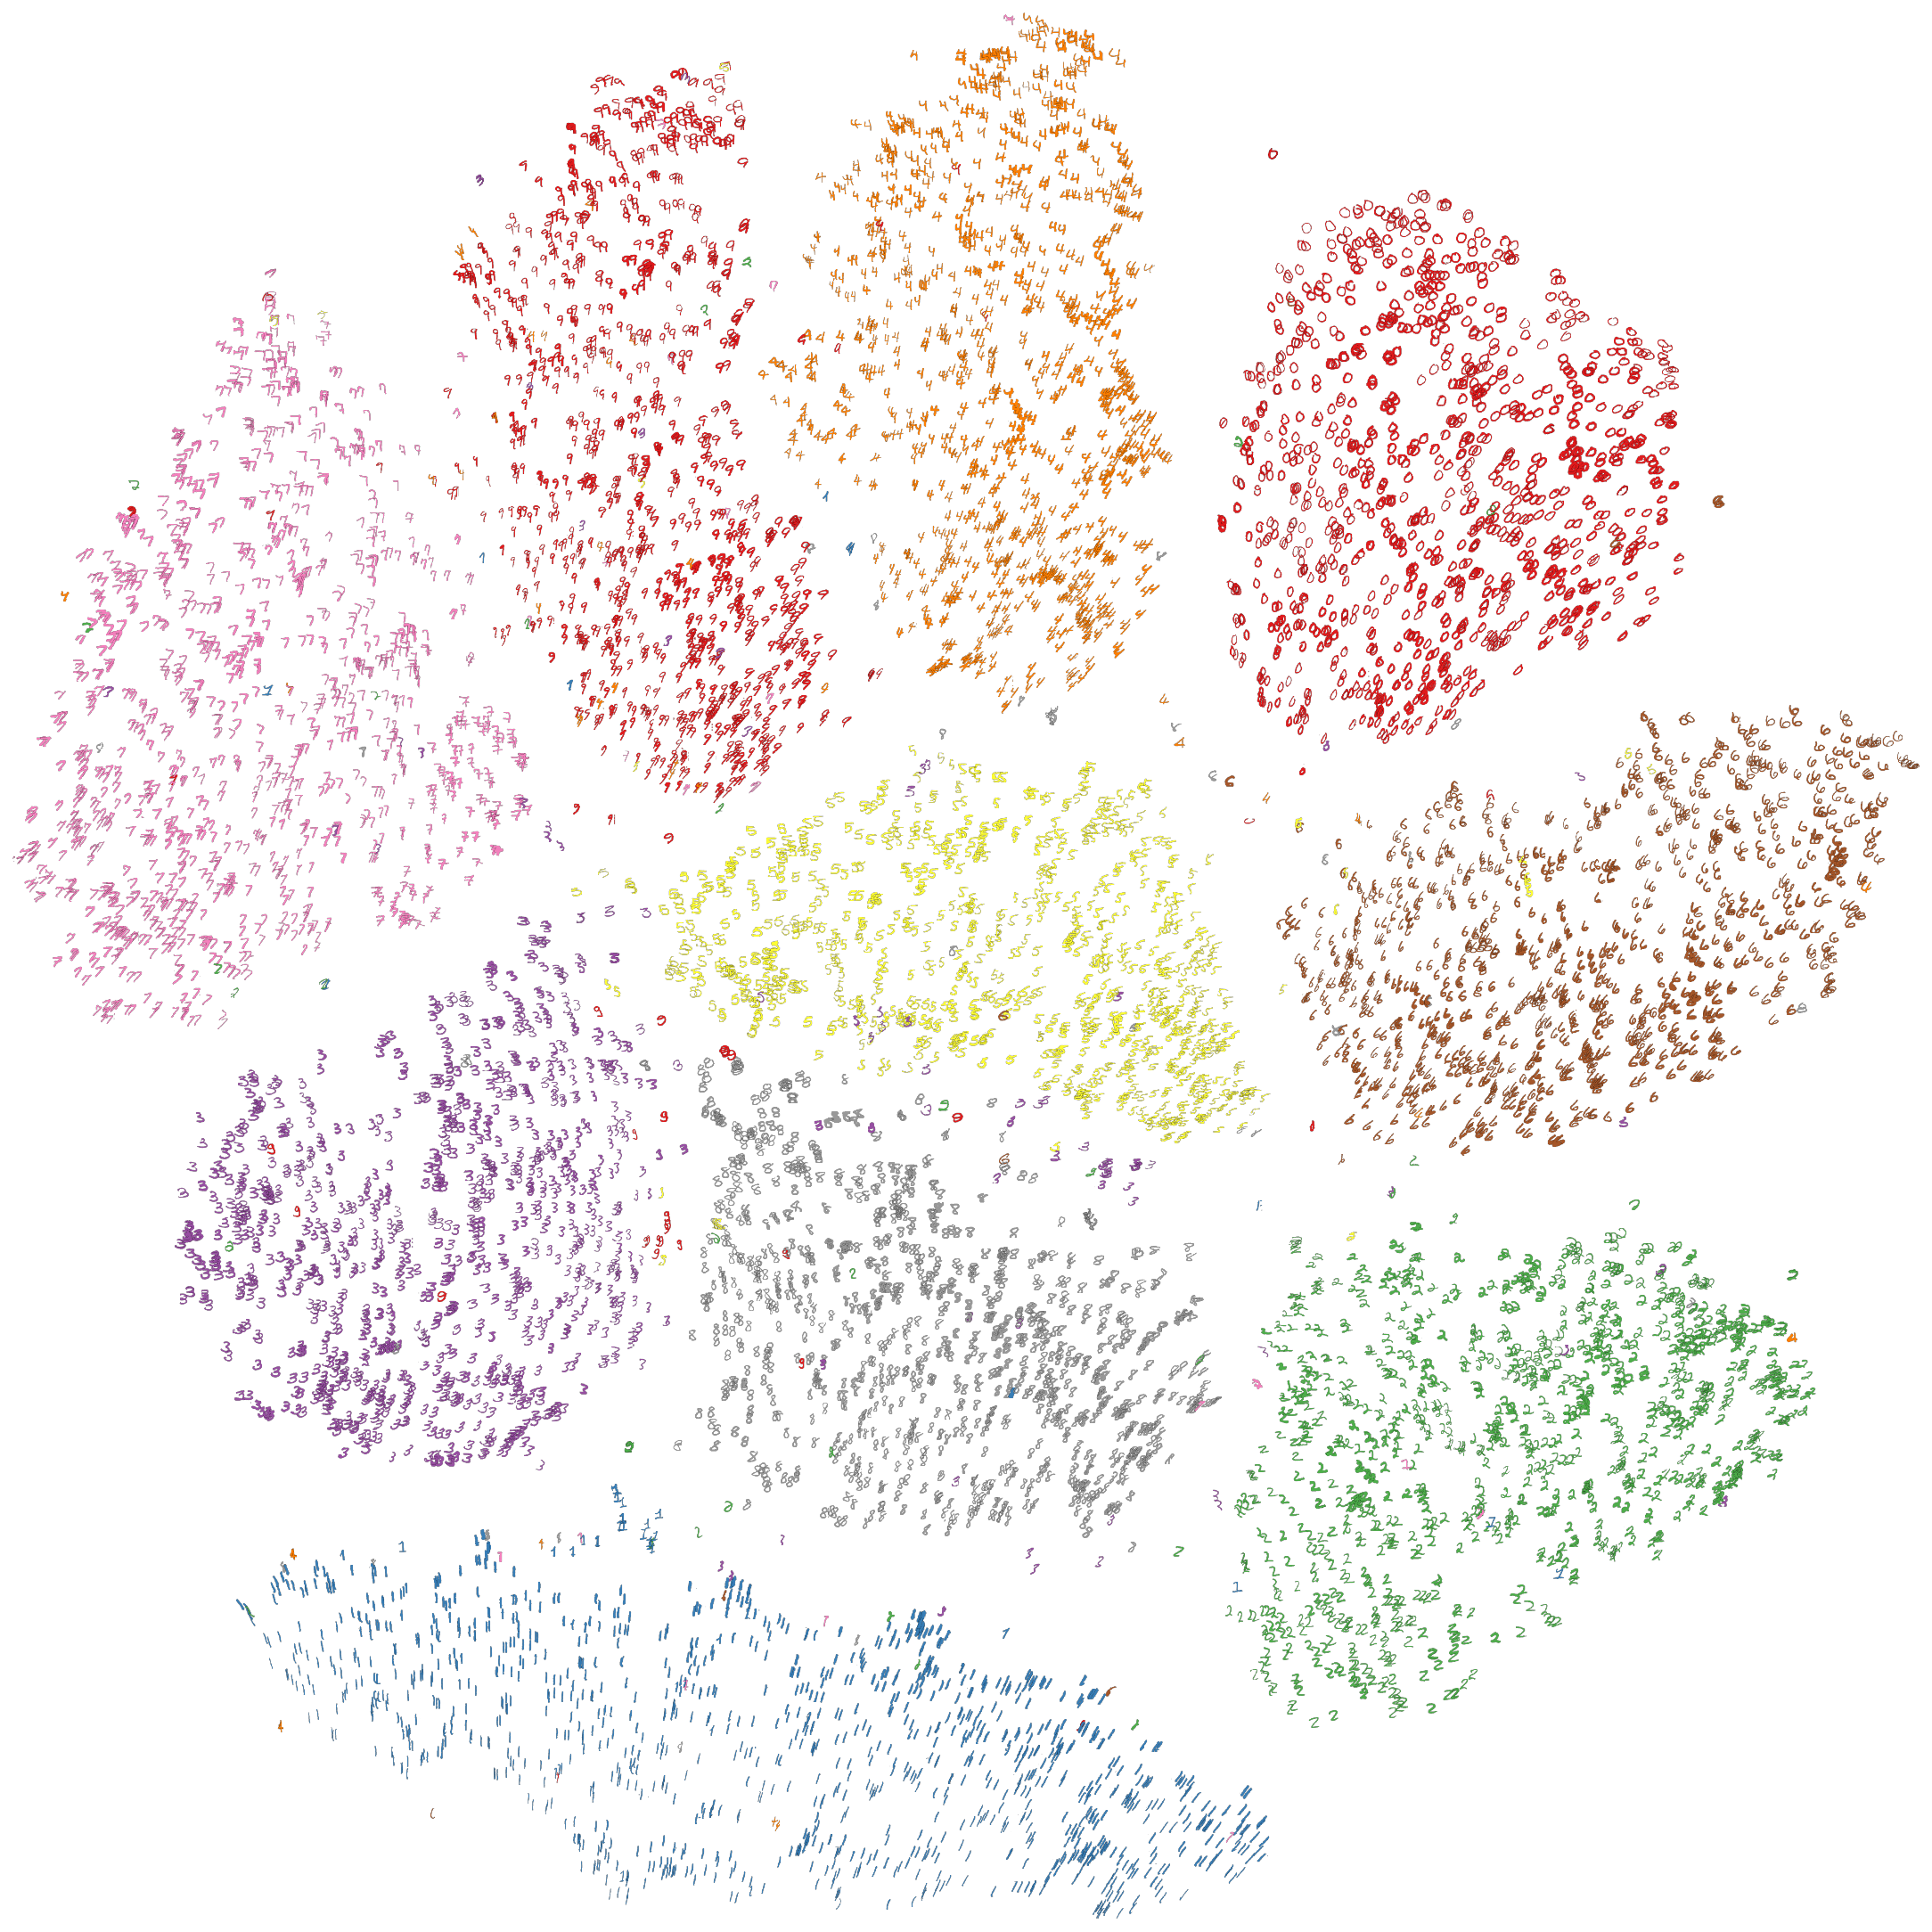

In [15]:
create_data_image(
    X[:10000], Z[:10000], labels[:10000], 
    figsize=(30, 30), fname='tsne_mnist.png'
)

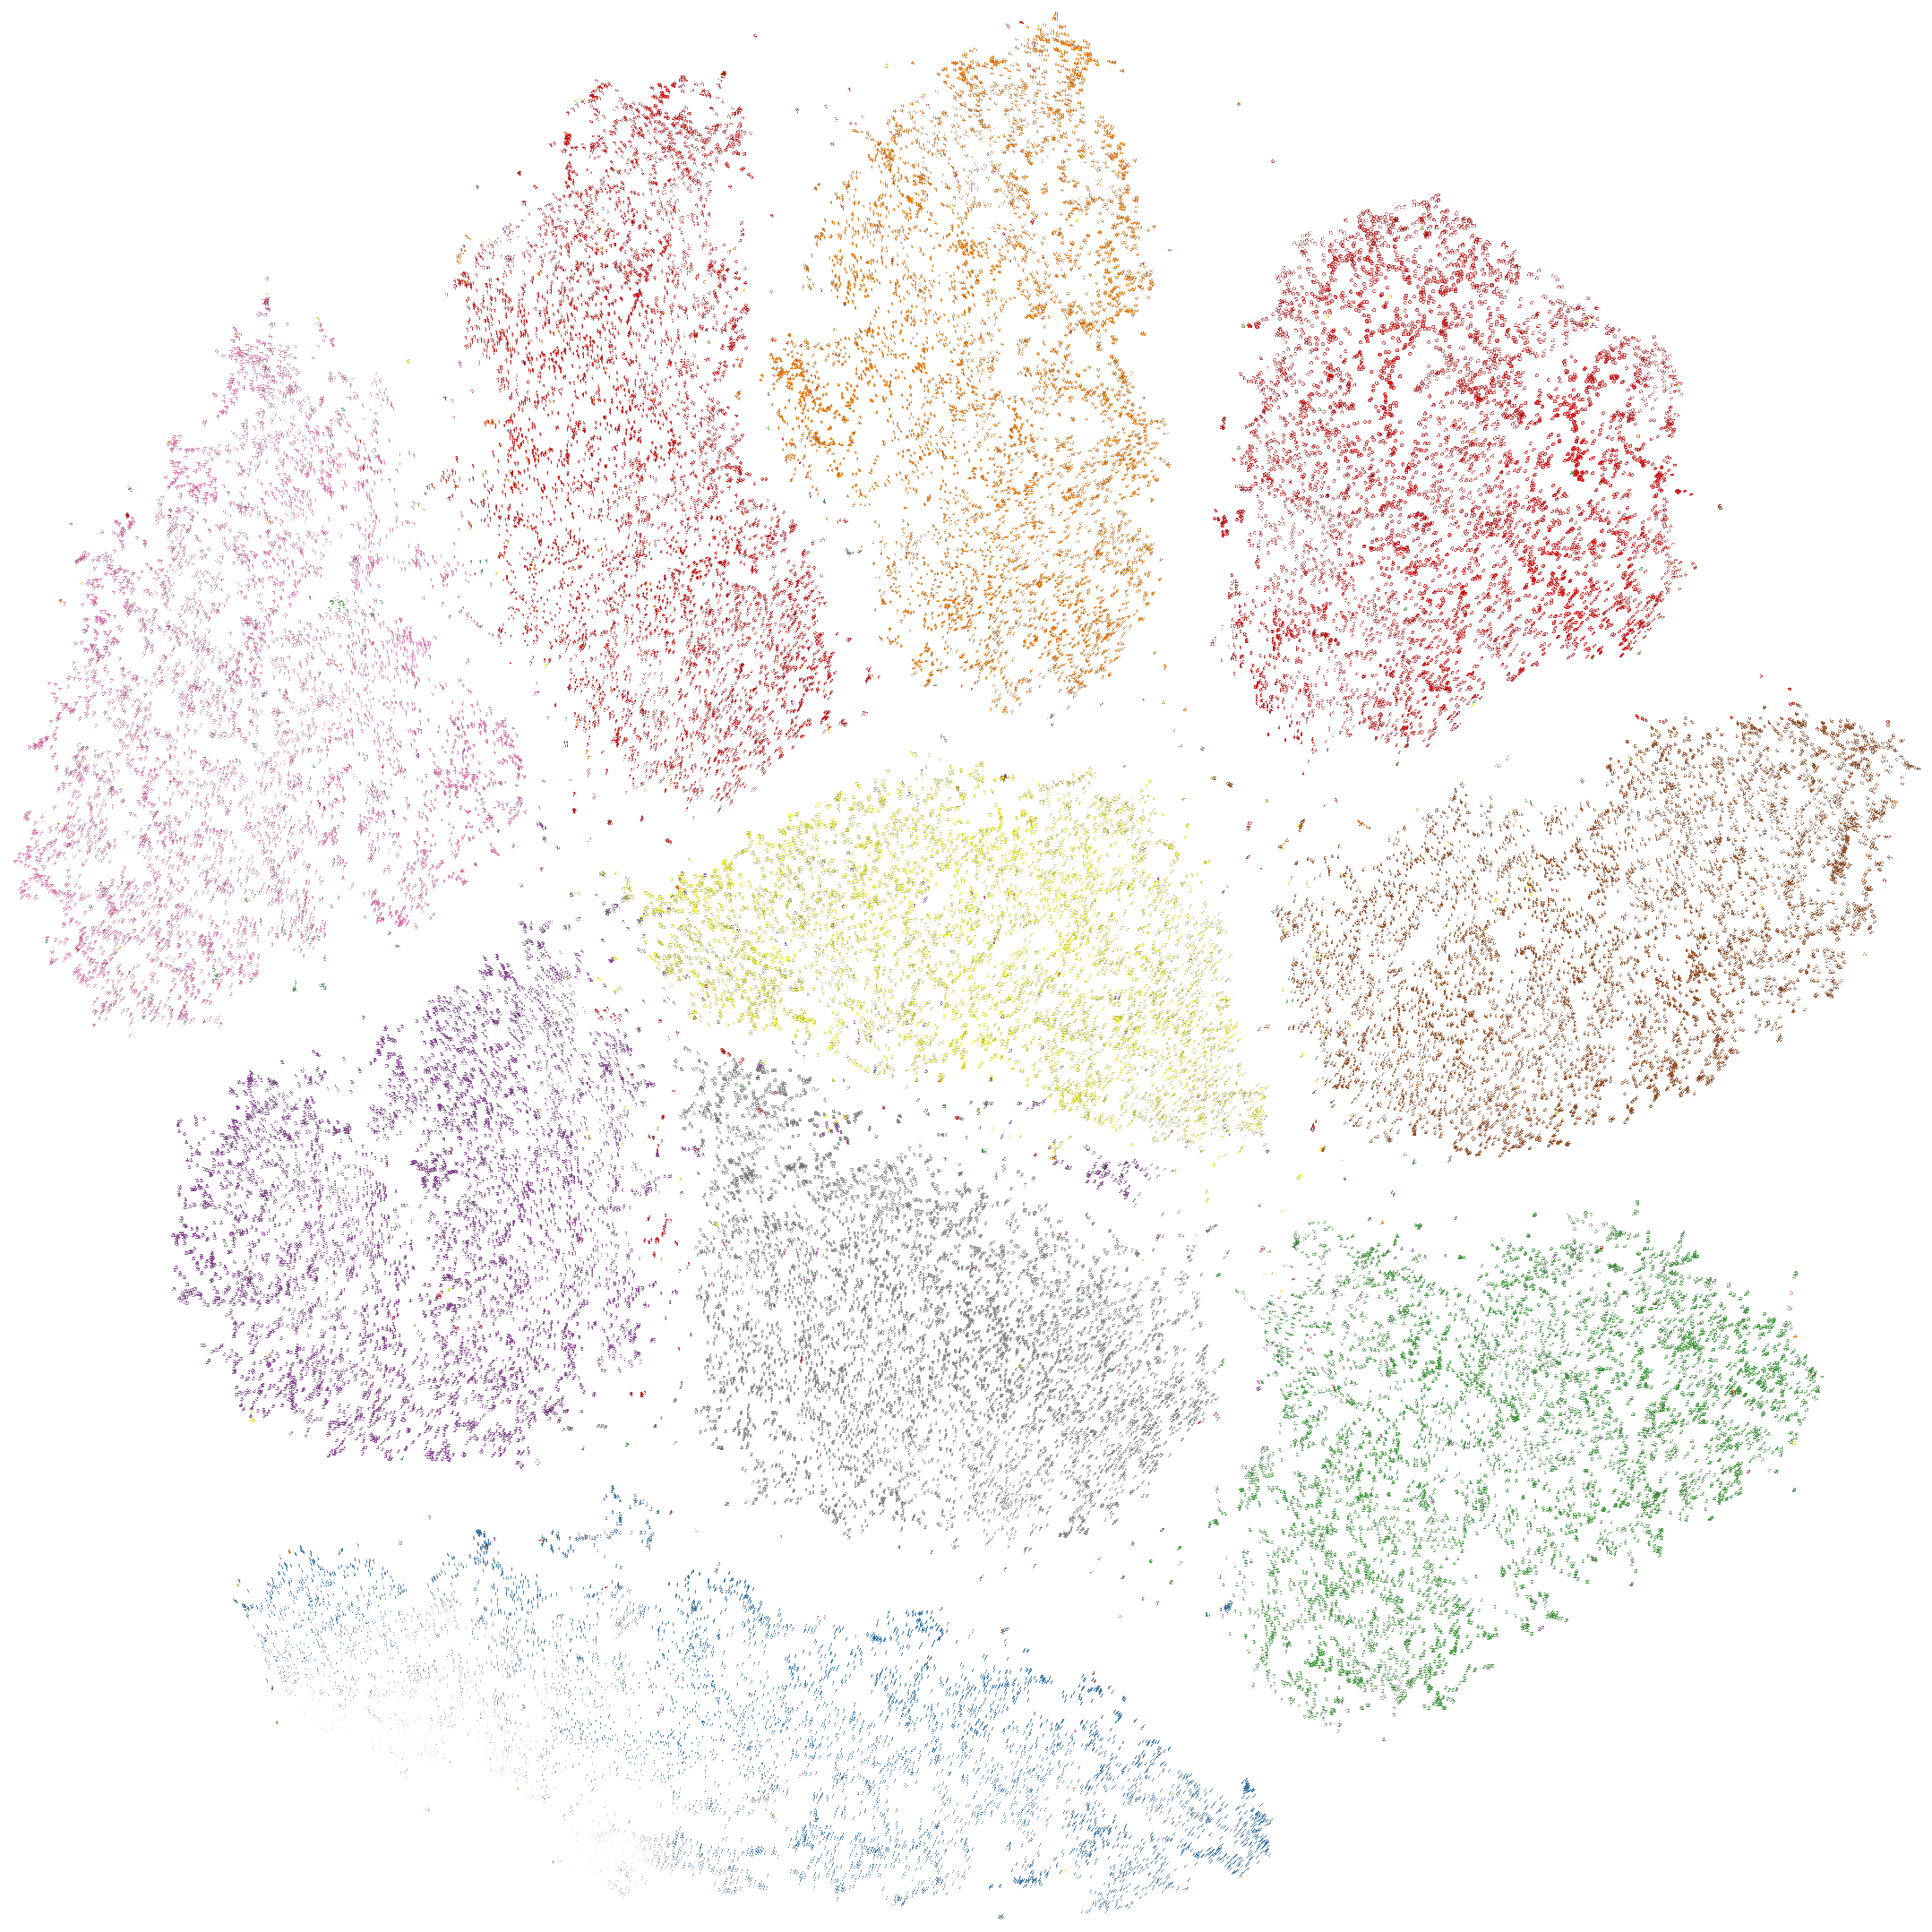

In [19]:
create_data_image(
    X, Z, labels, figsize=(30, 30), zoom=0.2, 
    dpi=300, fname='tsne_mnist_all_3.png'
)